# Campus Placement
### Academic and Employability Factors influencing placement
##### What is in it?
This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students
##### Questions:-
1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?
4. Play with the data conducting all statistical tests.
##### Features Discription:-

#1. sl_no = Serial Number
#2. gender = Gender- Male='M',Female='F'0
#3. ssc_p = Secondary Education percentage- 10th Grade
#4. ssc_b = Board of Education- Central/ Others
#5. hsc_p = Higher Secondary Education percentage- 12th Grade
#6. hsc_b = Board of Education- Central/ Others
#7. hsc_s = Specialization in Higher Secondary Education
#8. degree_p = Degree Percentage
#9. degree_t = Under Graduation(Degree type)- Field of degree education
#10. workex = Work Experience
#11. etest_p = Employability test percentage ( conducted by college)
#12. specialisation = Post Graduation(MBA)- Specialization
#13. mba_p = MBA percentage
#14. status = Status of placement- Placed/Not placed
#15. salary = Salary offered by corporate to candidates

## Let' s load our data first

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [23]:
df = pd.read_csv('Placement_Data.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Data cleaning

In [24]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

##### We are getting some null values in our salary feature. Let's check if it is coming due to the person not get placed in any company or is there any anamolies.

In [25]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [26]:
df['salary'][df['status']=='Placed'].unique()

array([270000., 200000., 250000., 425000., 252000., 231000., 260000.,
       218000., 300000., 236000., 265000., 393000., 360000., 240000.,
       350000., 278000., 320000., 411000., 287000., 204000., 450000.,
       216000., 220000., 268000., 275000., 336000., 230000., 500000.,
       400000., 210000., 420000., 380000., 280000., 276000., 940000.,
       225000., 233000., 690000., 340000., 255000., 285000., 290000.,
       650000., 264000., 295000.])

###### from above 2 tests we get to know that the nan value is only due to the person not get placed.
##### NOTE:- we will not remove it will will just replace it with 0 value

In [27]:
# let just replace the nan value with 0
df['salary'].fillna(0,inplace=True)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [28]:
df = df.drop('sl_no',1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [29]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [42]:
df1 = df.copy()

## Data Analysis

In [30]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

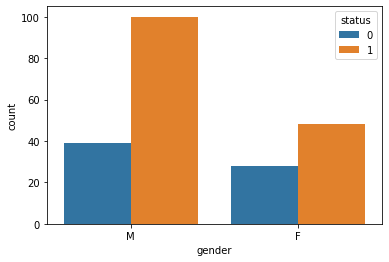

In [33]:
sns.countplot(x= 'gender', data = df, hue = 'status')

In [35]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.607889,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.491228,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.479861,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.127639,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.076922,0.139823
status,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000,0.865774
salary,0.538090,0.452569,0.408371,0.186988,0.139823,0.865774,1.000000


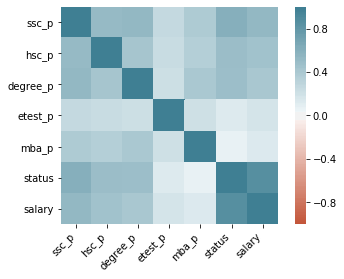

In [38]:
# let check the correlation of features between each other
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [43]:
df1['status'] = df1['status'].map({1: 'Placed', 0: 'Not Placed'})
df1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


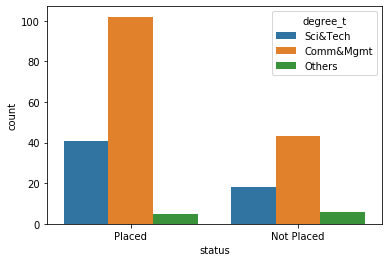

In [44]:
sns.countplot(x= 'status', data = df1, hue = 'degree_t')

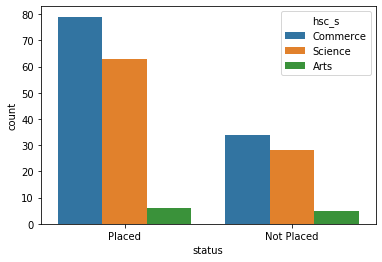

In [46]:
sns.countplot(x= 'status', data = df1, hue = 'hsc_s')

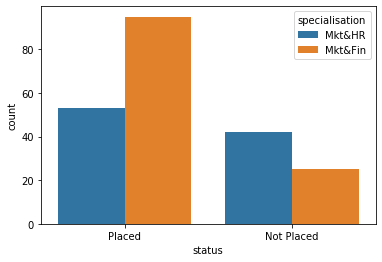

In [47]:
sns.countplot(x= 'status', data = df1, hue = 'specialisation')

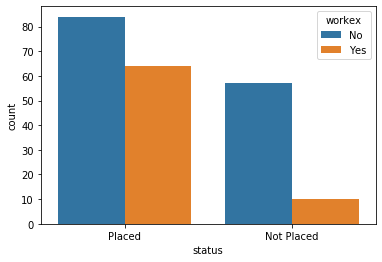

In [48]:
sns.countplot(x= 'status', data = df1, hue = 'workex')

### Q1. Which factor influenced a candidate in getting placed?
##### Ans->  10th and 12th have a high probability of getting placed. Employability test percentage ( conducted by college) and Undergraduate percentage also have a little probability of getting job.

### Q2. Does percentage matters for one to get placed?
##### Ans->  Yes, it has shown a good probability that good percentage has high chances of getting placed.

### Q3. Which degree specialization is much demanded by corporate?
##### Ans->  Mkt&Fin (marketing and finance) have high demand.

# Creating perfect data for prediction

In [49]:
df1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [50]:
# Board of Education are not an important feature for prediction
df1 = df1.drop(['ssc_b','hsc_b'], 1)
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [53]:
# let make a dummies for hsc_s, degree_t and specialisation as they are important for prediction
dummie_col = ['hsc_s','degree_t', 'specialisation']

In [54]:
dummies = pd.get_dummies(df1[dummie_col])
dummies.head()

,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1
4,0,1,0,1,0,0,1,0


In [56]:
df2 = pd.concat([df1,dummies],1)
df2.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,0,0,1,0,1
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1,0,0,1,1,0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0,1,0,0,1,0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,0,1,0,0,1,0,1
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,0,1,0,0,1,0


In [57]:
df2 = df2.drop(dummie_col,1)
df2.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.00,91.00,58.00,No,55.0,58.80,Placed,270000.0,0,1,0,0,0,1,0,1
1,M,79.33,78.33,77.48,Yes,86.5,66.28,Placed,200000.0,0,0,1,0,0,1,1,0
2,M,65.00,68.00,64.00,No,75.0,57.80,Placed,250000.0,1,0,0,1,0,0,1,0
3,M,56.00,52.00,52.00,No,66.0,59.43,Not Placed,0.0,0,0,1,0,0,1,0,1
4,M,85.80,73.60,73.30,No,96.8,55.50,Placed,425000.0,0,1,0,1,0,0,1,0


In [58]:
df2['workex'] = df2['workex'].map({'No':0, 'Yes': 1})
df2['status'] = df2['status'].map({'Placed':1, 'Not Placed':0})

In [59]:
df2.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,0,1,0,0,0,1,0,1
1,M,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,0,0,1,0,0,1,1,0
2,M,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,0,0,1,0,0,1,0
3,M,56.00,52.00,52.00,0,66.0,59.43,0,0.0,0,0,1,0,0,1,0,1
4,M,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,0,1,0,1,0,0,1,0


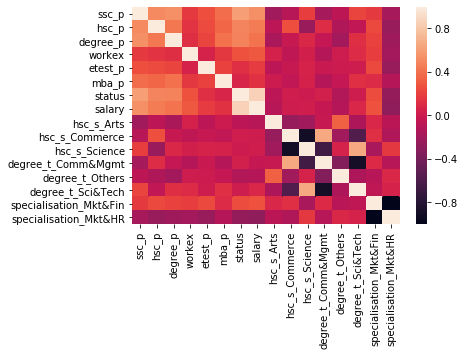

In [63]:
cor = df2.corr()
sns.heatmap(cor)

## Finding a good model

In [65]:
X = df2.drop(['status','salary'],1)
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.00,91.00,58.00,0,55.0,58.80,0,1,0,0,0,1,0,1
1,M,79.33,78.33,77.48,1,86.5,66.28,0,0,1,0,0,1,1,0
2,M,65.00,68.00,64.00,0,75.0,57.80,1,0,0,1,0,0,1,0
3,M,56.00,52.00,52.00,0,66.0,59.43,0,0,1,0,0,1,0,1
4,M,85.80,73.60,73.30,0,96.8,55.50,0,1,0,1,0,0,1,0


In [69]:
X['gender'] = X['gender'].map({'M':1,'F':0})
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,0,1,0,0,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,66.28,0,0,1,0,0,1,1,0
2,1,65.00,68.00,64.00,0,75.0,57.80,1,0,0,1,0,0,1,0
3,1,56.00,52.00,52.00,0,66.0,59.43,0,0,1,0,0,1,0,1
4,1,85.80,73.60,73.30,0,96.8,55.50,0,1,0,1,0,0,1,0


In [66]:
y = df2['status']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

In [79]:
from sklearn.linear_model import Lasso
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'max_depth': range(1, 8),
                'max_leaf_nodes': range(2, 6)
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'loss': ['deviance', 'exponential']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

,model,best_score,best_params
0,linear_regression,0.461222,{'normalize': False}
1,lasso,0.275946,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.118415,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.813953,"{'max_depth': 7, 'max_leaf_nodes': 5}"
4,logistic_regression,0.851163,{'solver': 'newton-cg'}
5,gradient_boosting,0.851163,{'loss': 'deviance'}


#### From Above Gradient Boosting and Logistic Regression has high score

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [84]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.813953488372093

In [85]:
# Train a Logistic Regression model
display_scores(-cross_val_score(lr, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(lr, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [0.18604651 0.11627907 0.11627907 0.06976744 0.11627907]
Mean: 0.12093023255813953
Standard deviation: 0.037209302325581395
Scores: [0.43133109 0.34099717 0.34099717 0.26413527 0.34099717]
Mean: 0.3436915747834302
Standard deviation: 0.05297484290703781


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7906976744186046

In [87]:
# Train a Random Forest model
display_scores(-cross_val_score(rf, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(rf, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [0.20930233 0.06976744 0.18604651 0.1627907  0.1627907 ]
Mean: 0.15813953488372096
Standard deviation: 0.04743273966132823
Scores: [0.40347329 0.34099717 0.45749571 0.21566555 0.34099717]
Mean: 0.35172577785362574
Standard deviation: 0.0807560235078275


#### let's use Logistic Regression

In [94]:
lr = LogisticRegression(solver= 'newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_predict = lr.predict(X)

In [97]:
from sklearn.metrics import confusion_matrix 

In [98]:
cnf_matrix = confusion_matrix(y, y_predict)
np.set_printoptions(precision=2)

In [99]:
cnf_matrix

array([[ 51,  16],
       [  8, 140]], dtype=int64)

In [100]:
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,0,55.0,58.80,0,1,0,0,0,1,0,1
1,1,79.33,78.33,77.48,1,86.5,66.28,0,0,1,0,0,1,1,0
2,1,65.00,68.00,64.00,0,75.0,57.80,1,0,0,1,0,0,1,0
3,1,56.00,52.00,52.00,0,66.0,59.43,0,0,1,0,0,1,0,1
4,1,85.80,73.60,73.30,0,96.8,55.50,0,1,0,1,0,0,1,0


## Test the model for few properties

In [102]:
def predict_placement(hsc_s,degree_t,specialisation,gender,ssc_p,hsc_p,degree_p,mba_p,etest_p,workex):    
    loc_index = np.where(X.columns==hsc_s)[0][0]
    loc_index = np.where(X.columns==degree_t)[0][0]
    loc_index = np.where(X.columns==specialisation)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = gender
    x[1] = ssc_p
    x[2] = hsc_p
    x[3] = degree_p
    x[4] = mba_p
    x[5] = etest_p
    x[6] = workex
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [130]:
predict_placement('hsc_s_Science','degree_t_Sci&Tech','specialisation_Mkt&HR',1,56.00, 52.00, 52.00, 59.43,66.0,0)

1

In [136]:
y_predict

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [142]:
y_predict = pd.DataFrame(y_predict)
y_predict.head()

,0
0,1
1,1
2,1
3,0
4,1


In [144]:
y_predict =y_predict.rename(columns={0:'y_predict'})
y_predict.head()

,y_predict
0,1
1,1
2,1
3,0
4,1


In [146]:
final_df = pd.concat([y,y_predict],1)
final_df.head()

,status,y_predict
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


## Final_df will tell you how accurate is your model

In [148]:
final_df.status.value_counts()

1    148
0     67
Name: status, dtype: int64

In [149]:
final_df.y_predict.value_counts()

1    156
0     59
Name: y_predict, dtype: int64

## Saving our model
###### import pickle
###### with open('Campus Placement.pickle','wb') as f:
######    pickle.dump(lr,f)